
--- Profiling Column: Age ---
count     15.000000
mean      36.333333
std       18.664966
min       22.000000
25%       27.500000
50%       31.000000
75%       37.000000
max      100.000000
Name: Age, dtype: float64
Skewness: 3.18
Kurtosis: 11.19
Number of outliers: 1
Outlier range: < 13.25 or > 51.25


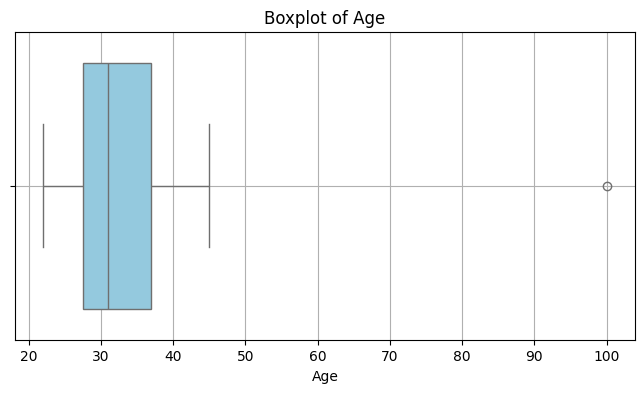

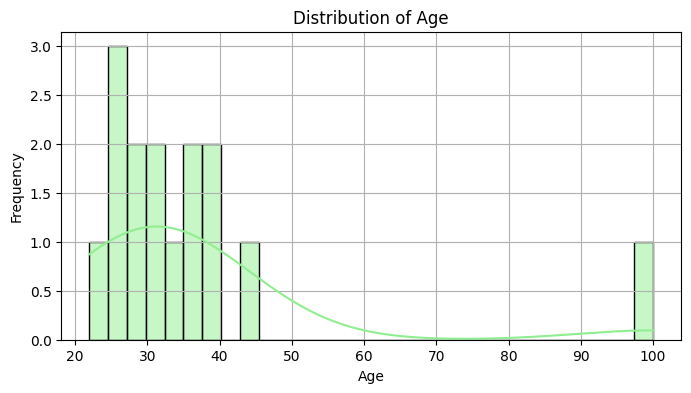


--- Profiling Column: Salary ---
count        15.000000
mean      69866.666667
std       64810.566452
min       35000.000000
25%       45000.000000
50%       52000.000000
75%       63000.000000
max      300000.000000
Name: Salary, dtype: float64
Skewness: 3.64
Kurtosis: 13.73
Number of outliers: 1
Outlier range: < 18000.00 or > 90000.00


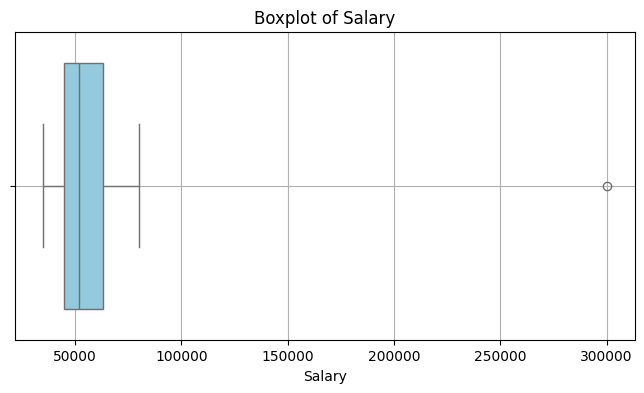

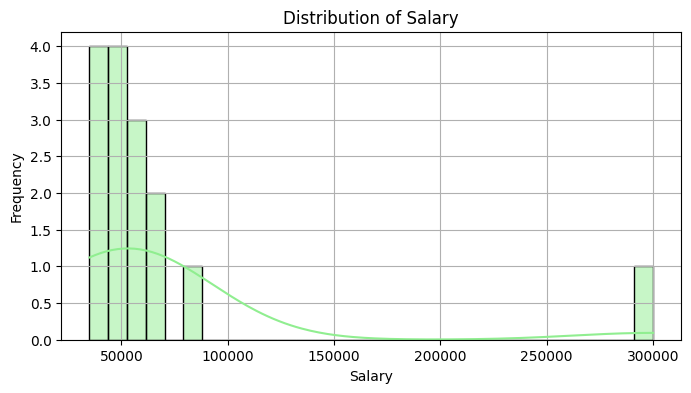

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def advanced_profiling_with_outliers(df):
    if df.empty:
        print("The dataset is empty.")
        return

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        print(f"\n--- Profiling Column: {col} ---")
        print(df[col].describe())

        # Skewness & Kurtosis
        print(f"Skewness: {df[col].skew():.2f}")
        print(f"Kurtosis: {df[col].kurt():.2f}")

        # Outlier detection using IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        print(f"Number of outliers: {outliers.shape[0]}")
        print(f"Outlier range: < {lower_bound:.2f} or > {upper_bound:.2f}")

        # Boxplot
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.grid(True)
        plt.show()

        # Histogram
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30, color='lightgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Sample usage
data = {
    'Age': [25, 30, 22, 40, 28, 35, 38, 31, 29, 45, 27, 26, 33, 100, 36],
    'Salary': [40000, 52000, 35000, 70000, 48000, 61000, 65000, 50000, 47000, 80000, 43000, 42000, 55000, 300000, 60000]
}
df = pd.DataFrame(data)

advanced_profiling_with_outliers(df)
